In [ ]:
pip install spotipy

ERROR: Operation cancelled by user


In [ ]:
from spotipy.oauth2 import SpotifyOAuth
from google.colab import files
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import spotipy
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import accuracy_score
from scipy import stats   
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import timeit
import time
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import set_printoptions
from sklearn.feature_selection import SelectFromModel
import ast 
import sys
import json
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
client_id = '238e859d309249ccbe58da9c6c0e6b54'
client_secret = '2a0d395ac7c5418ab7de8ca760875e22'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
# Defining a function to return audio features for a particular track id
def audio_feats(track_id):
    a=sp.audio_features(track_id)
    return a

In [62]:
#looking at the format to define the other function
audio_feats('0y2Ga0Au2NZaRuIGEAiwTQ')

[{'acousticness': 0.889,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0y2Ga0Au2NZaRuIGEAiwTQ',
  'danceability': 0.653,
  'duration_ms': 181680,
  'energy': 0.332,
  'id': '0y2Ga0Au2NZaRuIGEAiwTQ',
  'instrumentalness': 0.404,
  'key': 7,
  'liveness': 0.108,
  'loudness': -15.519,
  'mode': 1,
  'speechiness': 0.0502,
  'tempo': 135.06,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/0y2Ga0Au2NZaRuIGEAiwTQ',
  'type': 'audio_features',
  'uri': 'spotify:track:0y2Ga0Au2NZaRuIGEAiwTQ',
  'valence': 0.289}]

In [63]:
# Available markets - will convert to length to get a new feature - No of markets
sp.search(q="year:2017", type='track', limit=1)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=year%3A2017&type=track&offset=0&limit=1',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/15UsOTVnJzReFVN1VCnxy4'},
       'href': 'https://api.spotify.com/v1/artists/15UsOTVnJzReFVN1VCnxy4',
       'id': '15UsOTVnJzReFVN1VCnxy4',
       'name': 'XXXTENTACION',
       'type': 'artist',
       'uri': 'spotify:artist:15UsOTVnJzReFVN1VCnxy4'}],
     'available_markets': ['AD',
      'AE',
      'AL',
      'AR',
      'AT',
      'AU',
      'BA',
      'BE',
      'BG',
      'BH',
      'BO',
      'BR',
      'BY',
      'CA',
      'CH',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DE',
      'DK',
      'DO',
      'DZ',
      'EC',
      'EE',
      'EG',
      'ES',
      'FI',
      'FR',
      'GB',
      'GR',
      'GT',
      'HK',
      'HN',
      'HR',
      'HU',
      'ID',
      'IE',
      'IL',
      'IN',
    

In [ ]:
# Returns audio_features to prepare it for a dataframe
def feat_value_extract(Data):
 acousticness=[]
 danceability=[]
 analysis_url=[]
 duration_ms=[]
 energy=[]
 track_id=[]
 instrumentalness=[]
 key=[]
 liveness=[]
 loudness=[]
 mode=[]
 speechiness=[]
 tempo=[]
 time_signature=[]
 track_href=[]
 uri=[]
 valence=[]

 for i in Data['track_id']:
  if i != [None]:
   acousticness.append(i[0]['acousticness'])
   danceability.append(i[0]['danceability'])
   analysis_url.append(i[0]['analysis_url'])
   duration_ms.append(i[0]['duration_ms'])
   energy.append(i[0]['energy'])
   track_id.append(i[0]['id'])
   instrumentalness.append(i[0]['instrumentalness'])
   key.append(i[0]['key'])
   liveness.append(i[0]['liveness'])
   loudness.append(i[0]['loudness'])
   mode.append(i[0]['mode'])
   speechiness.append(i[0]['speechiness'])
   tempo.append(i[0]['tempo'])
   time_signature.append(i[0]['time_signature'])
   track_href.append(i[0]['track_href'])
   uri.append(i[0]['uri'])
   valence.append(i[0]['valence'])
 return acousticness,danceability,analysis_url,duration_ms,energy,track_id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,uri, valence

In [ ]:
# defining a function to query tracks by year range
def query(sample_size,yearold,yearnew):
 artist_name = []
 track_name = []
 popularity = []
 track_id = []
 available_markets=[]
 year=[]
 for j in range(yearold,yearnew+1): 
   for i in range(0,sample_size,50):
      track_results = sp.search(q=f"year:{j}", type='track', limit=50,offset=i)
      for i, t in enumerate(track_results['tracks']['items']):
         artist_name.append(t['artists'][0]['name'])
         track_name.append(t['name'])
         track_id.append(t['id'])
         available_markets.append(len(t['available_markets']))
         popularity.append(t['popularity'])
         year.append(j)

 return year,artist_name,track_name,track_id,available_markets,popularity



In [ ]:
def createdata():
 Data=pd.DataFrame({'Artist':artist_name,'Track':track_name,'track_id':track_id,'NoOfMarkets':available_markets,'PopularityScore':popularity,'Year':year})
 return Data

In [ ]:
def createdata_feats():
 Data=pd.DataFrame({'acousticness':acousticness ,'danceability':danceability,'analysis_url':analysis_url,'duration_ms':duration_ms,'energy':energy,'track_id':track_id,'instrumentalness':instrumentalness,'key':key,'liveness':liveness,'loudness':loudness,'mode':mode,'speechiness':speechiness,'tempo':tempo,'time_signature':time_signature,'track_href':track_href,'uri':uri,'valence':valence})
 return Data

In [ ]:
# Creating the entire DataFrame , takes quite a while to run
start = timeit.default_timer()
year,artist_name,track_name,track_id,available_markets,popularity=query(2000,1980,2020)
DataFrame=createdata()
Data=pd.DataFrame(DataFrame['track_id'].map(lambda x:audio_feats(x)))
acousticness,danceability,analysis_url,duration_ms,energy,track_id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,uri, valence=feat_value_extract(Data)
DataTrack=createdata_feats()
stop = timeit.default_timer()
execution_time = stop - start
print("Program Executed in "+str(execution_time))


KeyboardInterrupt: ignored

In [ ]:
# Converting to csv to save
DataFrame.to_csv('/drive/My Drive/SpotifyData/ArtistData1.csv')
DataTrack.to_csv('/drive/My Drive/SpotifyData/TrackData.csv')

In [ ]:

from google.colab import  drive
drive.mount('/drive' )


In [64]:

DataTrack=pd.read_csv('/drive/My Drive/SpotifyData/TrackData.csv')
DataFrame=pd.read_csv('/drive/My Drive/SpotifyData/ArtistData1.csv')

In [65]:
# Merged Frame including Popularity & Audio Features
DataFinal=pd.merge(DataTrack,DataFrame,on='track_id',how='inner')
DataFinal

,Unnamed: 0_x,acousticness,danceability,analysis_url,duration_ms,energy,track_id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,uri,valence,Unnamed: 0_y,Artist,Track,NoOfMarkets,PopularityScore,Year
0,0,0.01100,0.310,https://api.spotify.com/v1/audio-analysis/08mG...,255493,0.700,08mG3Y1vljYA6bvDt4Wqkj,0.009650,9,0.0828,-5.678,1,0.0470,188.386,4,https://api.spotify.com/v1/tracks/08mG3Y1vljYA...,spotify:track:08mG3Y1vljYA6bvDt4Wqkj,0.7630,0,AC/DC,Back In Black,92,84,1980
1,1,0.23400,0.750,https://api.spotify.com/v1/audio-analysis/4o6B...,190627,0.501,4o6BgsqLIBViaGVbx5rbRk,0.112000,5,0.0467,-12.151,1,0.0552,167.060,4,https://api.spotify.com/v1/tracks/4o6BgsqLIBVi...,spotify:track:4o6BgsqLIBViaGVbx5rbRk,0.9020,1,Daryl Hall & John Oates,You Make My Dreams (Come True),92,79,1980
2,2,0.11200,0.933,https://api.spotify.com/v1/audio-analysis/57JV...,214653,0.528,57JVGBtBLCfHw2muk5416J,0.329000,5,0.1630,-6.472,0,0.1620,109.975,4,https://api.spotify.com/v1/tracks/57JVGBtBLCfH...,spotify:track:57JVGBtBLCfHw2muk5416J,0.7560,2,Queen,Another One Bites The Dust - Remastered 2011,2,74,1980
3,3,0.36100,0.453,https://api.spotify.com/v1/audio-analysis/2b9l...,296200,0.906,2b9lp5A6CqSzwOrBfAFhof,0.000569,9,0.2600,-4.001,1,0.1150,137.575,4,https://api.spotify.com/v1/tracks/2b9lp5A6CqSz...,spotify:track:2b9lp5A6CqSzwOrBfAFhof,0.4730,3,Ozzy Osbourne,Crazy Train,92,78,1980
4,4,0.00287,0.532,https://api.spotify.com/v1/audio-analysis/2SiX...,210173,0.767,2SiXAy7TuUkycRVbbWDEpo,0.000513,7,0.3900,-5.509,1,0.0574,127.361,4,https://api.spotify.com/v1/tracks/2SiXAy7TuUky...,spotify:track:2SiXAy7TuUkycRVbbWDEpo,0.7550,4,AC/DC,You Shook Me All Night Long,92,81,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81994,81994,0.85400,0.289,https://api.spotify.com/v1/audio-analysis/1yOc...,328232,0.307,1yOc6FBOVD6zBwOMxiSEEv,0.275000,4,0.2550,-16.036,1,0.0452,96.516,4,https://api.spotify.com/v1/tracks/1yOc6FBOVD6z...,spotify:track:1yOc6FBOVD6zBwOMxiSEEv,0.0477,81995,Glass Animals,Helium,92,67,2020
81995,81995,0.74400,0.791,https://api.spotify.com/v1/audio-analysis/5m0e...,211373,0.366,5m0eMnsWwzgGsUxe1mhFYR,0.000007,1,0.1060,-8.337,1,0.0966,124.878,4,https://api.spotify.com/v1/tracks/5m0eMnsWwzgG...,spotify:track:5m0eMnsWwzgGsUxe1mhFYR,0.3350,81996,Summer Walker,White Tee (with NO1-NOAH),92,68,2020
81996,81996,0.12500,0.670,https://api.spotify.com/v1/audio-analysis/2QNn...,146832,0.529,2QNndTbo9mvgOoOKJvpEl2,0.000006,8,0.1090,-7.254,1,0.3230,161.034,4,https://api.spotify.com/v1/tracks/2QNndTbo9mvg...,spotify:track:2QNndTbo9mvgOoOKJvpEl2,0.3610,81997,Bazzi,I Got You,92,71,2020
81997,81997,0.47100,0.607,https://api.spotify.com/v1/audio-analysis/5LPl...,130760,0.548,5LPlvbxA6bJQHvUW12Mr22,0.000000,2,0.1950,-3.453,1,0.0258,150.189,4,https://api.spotify.com/v1/tracks/5LPlvbxA6bJQ...,spotify:track:5LPlvbxA6bJQHvUW12Mr22,0.8270,81998,Christian Nodal,Amor Tóxico,92,79,2020


In [66]:

DataFinal.drop(['Unnamed: 0_x','Unnamed: 0_y'],axis=1,inplace=True)

In [ ]:
DataFinal.describe(include='all')

,acousticness,danceability,analysis_url,duration_ms,energy,track_id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,uri,valence,Artist,Track,NoOfMarkets,PopularityScore,Year
count,81999.000000,81999.000000,81999,8.199900e+04,81999.000000,81999,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999,81999,81999.000000,81999,81999,81999.000000,81999.000000,81999.000000
unique,NaN,NaN,81999,NaN,NaN,81999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81999,81999,NaN,13502,65733,NaN,NaN,NaN
top,NaN,NaN,https://api.spotify.com/v1/audio-analysis/2Laa...,NaN,NaN,2JVmIMxReovAFByF2IIN8i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://api.spotify.com/v1/tracks/0scNiAT9bGMn...,spotify:track:7MiLmLbwNoyf47xQ4TCVYp,NaN,J Balvin,Traicionera,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,270,88,NaN,NaN,NaN
mean,0.270346,0.577709,NaN,2.408327e+05,0.625194,NaN,0.089948,5.274503,0.197205,-8.813967,0.689057,0.085259,121.010983,3.912792,NaN,NaN,0.530418,NaN,NaN,76.469981,47.962500,1999.999805
std,0.298293,0.176904,NaN,9.226099e+04,0.238028,NaN,0.236459,3.558949,0.172304,4.856552,0.462882,0.098184,30.445392,0.394933,NaN,NaN,0.258450,NaN,NaN,31.393999,13.732999,11.832172
min,0.000000,0.000000,NaN,3.008000e+04,0.000000,NaN,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,1980.000000
25%,0.021300,0.462000,NaN,1.941070e+05,0.467000,NaN,0.000000,2.000000,0.092700,-10.987000,0.000000,0.034300,96.942500,4.000000,NaN,NaN,0.324000,NaN,NaN,87.000000,39.000000,1990.000000
50%,0.141000,0.591000,NaN,2.295730e+05,0.656000,NaN,0.000022,5.000000,0.128000,-7.654000,1.000000,0.046400,118.964000,4.000000,NaN,NaN,0.536000,NaN,NaN,92.000000,47.000000,2000.000000
75%,0.460000,0.709000,NaN,2.726270e+05,0.819000,NaN,0.005180,8.000000,0.254000,-5.478000,1.000000,0.085500,140.064500,4.000000,NaN,NaN,0.743000,NaN,NaN,92.000000,57.000000,2010.000000


In [ ]:
# Defining a function to get rid of outliers 
def outlier(Data):
 Q1 = Data.quantile(0.25)
 Q3 = Data.quantile(0.75)
 IQR = Q3 - Q1
 data_clean = Data[~((Data < (Q1 - 1.5 * IQR)) |(Data > (Q3 + 1.5 * IQR))).any(axis=1)]
 print(data_clean.shape)
 return data_clean

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

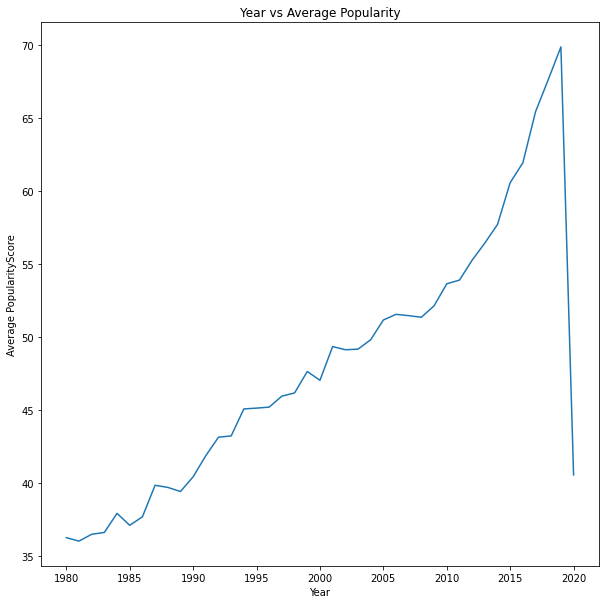

In [ ]:
# Year vs Avg Popularity, increasing by Year
fig=plt.figure(figsize=(10,10))
ax=sns.lineplot(data=DataFinal.groupby('Year')['PopularityScore'].mean())
ax.set_title("Year vs Average Popularity")
ax.set_xlabel('Year')

ax.set_ylabel('Average PopularityScore')
plt.savefig("Year_vs_AvgPopScore.png")
files.download("Year_vs_AvgPopScore.png")


In [ ]:
#Dividing Data into Decades
DataEight=DataFinal.loc[(DataFinal['Year'] <= 1989) ]
DataNine= DataFinal.loc[(DataFinal['Year'] <=1999) & (DataFinal['Year']>=1990) ]
DataZero= DataFinal.loc[(DataFinal['Year'] <=2009) & (DataFinal['Year']>=2000) ]
DataTen = DataFinal.loc[(DataFinal['Year'] <=2019) & (DataFinal['Year']>=2010) ]

In [ ]:
# Function for UniVariatePlots
def univariateplot(Data):
 fig=plt.figure(figsize=(20,20))
 rows=7
 cols=7
 DataNumerical=Data.drop(['track_href','uri','Track','track_id','analysis_url','Artist','Year'],axis=1)
 for i, feature in enumerate(DataNumerical.columns):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.distplot(DataNumerical[feature],kde=False)
    ax.set_title(feature+" Distribution",color='red')
 fig.tight_layout()     
 plt.show()

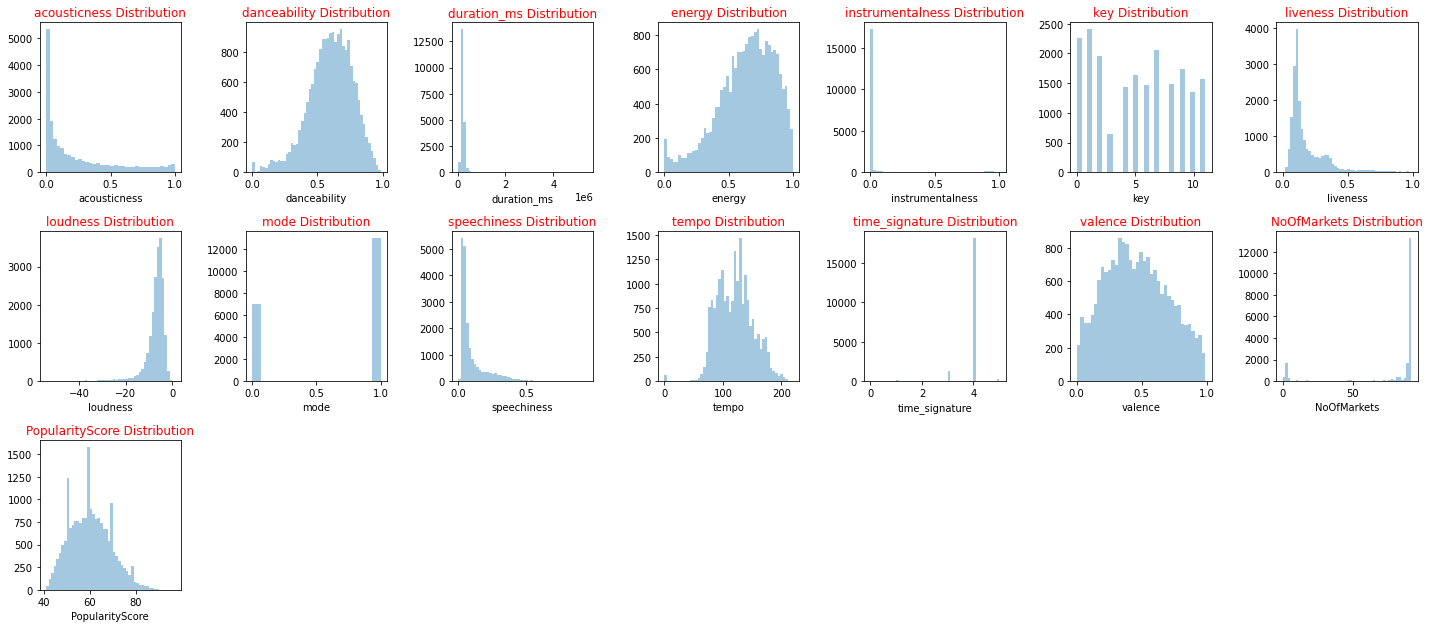

In [ ]:
univariateplot(DataTen)

In [ ]:
# a lot of 0s in the 2020 + low popularity score, so will not use data from the 2020s
DataFinal[DataFinal['PopularityScore']==0].groupby(['Year']).count()

,acousticness,danceability,analysis_url,duration_ms,energy,track_id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,uri,valence,Artist,Track,NoOfMarkets,PopularityScore
Year,,,,,,,,,,,,,,,,,,,,,
2020,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605


In [ ]:
# float64 precision should not be needed
DataEight.dtypes

acousticness        float64
danceability        float64
analysis_url         object
duration_ms           int64
energy              float64
track_id             object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
track_href           object
uri                  object
valence             float64
Artist               object
Track                object
NoOfMarkets           int64
PopularityScore       int64
Year                  int64
dtype: object

In [ ]:

def func(x):
  if x>8:
    x=1
  else:
    x=0
  return x


In [ ]:
#Function to Quantize Popularity Score on Popular -1 & Not Popular - 0
def PopQuant(Data):
 DataNumerical=Data.drop(['track_href','uri','Track','track_id','analysis_url','Artist','Year'],axis=1)
 DataNumerical['PopQuant']=pd.qcut(Data['PopularityScore'],10,labels=[0,1,2,3,4,5,6,7,8,9])
 out,bin=pd.qcut(DataNumerical['PopularityScore'],10,retbins=True)
 print("Binned Popularity according to 10 quantiles",bin)
 DataNumerical['PopQuant']=DataNumerical['PopQuant'].map(lambda x: func(x))
 return DataNumerical




In [ ]:
# Log transformation function / added arbriraty constants since data cannot be negative or 0
def transform(Data):
 Data['speechiness'], _ = stats.boxcox(Data['speechiness']+0.0000001)  
 Data['loudness'], _ = stats.boxcox(Data['loudness']-np.min(Data['loudness'])+0.0000001)  
 Data['liveness'] ,_ = stats.boxcox(Data['liveness']+0.0000001) 
 Data['instrumentalness'] ,_ = stats.boxcox(Data['instrumentalness']+0.0000001)
 Data['duration_ms'] ,_ = stats.boxcox(Data['duration_ms'])  
 Data['NoOfMarkets'] ,_ = stats.boxcox(Data['NoOfMarkets']+1)          
 xt_= (Data['speechiness'] - np.mean(Data['speechiness']) )/ np.std(Data['speechiness'])
 xt_1= (Data['loudness'] - np.mean(Data['loudness']) )/ np.std(Data['loudness'])
 xt_2= (Data['liveness'] - np.mean(Data['liveness']) )/ np.std(Data['liveness'])
 xt_3= (Data['instrumentalness'] - np.mean(Data['instrumentalness']) )/ np.std(Data['instrumentalness'])
 xt_4= (Data['duration_ms'] - np.mean(Data['duration_ms']) )/ np.std(Data['duration_ms'])
 xt_5= (Data['danceability'] - np.mean(Data['danceability']) )/ np.std(Data['danceability'])
 xt_6= (Data['energy'] - np.mean(Data['energy']) )/ np.std(Data['energy'])
 xt_7= (Data['valence'] - np.mean(Data['valence']) )/ np.std(Data['valence'])
 xt_8= (Data['NoOfMarkets'] - np.mean(Data['NoOfMarkets']) )/ np.std(Data['NoOfMarkets'])
 Data['speechiness']=xt_
 Data['loudness']=xt_1
 Data['liveness']=xt_2
 Data['instrumentalness']=xt_3
 Data['duration_ms'] = xt_4
 Data['danceability'] = xt_5
 Data['energy'] = xt_6
 Data['valence'] =xt_7
 Data['NoOfMarkets'] =xt_8
  

 return Data['speechiness'],Data['loudness'],Data['liveness'],Data['instrumentalness'],Data['duration_ms'],Data['danceability'],Data['energy'],Data['valence'],Data['NoOfMarkets']



In [67]:
# function for correlation heatmap
def heat_map(DataFinal,title):
 DataNumerical=PopQuant(DataFinal)
 print(title,":")

 f, ax = plt.subplots(figsize=(7, 7))
 corr_matrix=DataNumerical[['danceability','energy','loudness','valence','liveness','tempo','PopQuant','acousticness','duration_ms','instrumentalness']].corr()
 heatmap = sns.heatmap(corr_matrix,linewidths=.5,annot=True)
 plt.savefig(f'HeatMap_{title}.png' )
 files.download(f'HeatMap_{title}.png' )

 ax.set_yticklabels(corr_matrix.columns, rotation = 0)
 ax.set_xticklabels(corr_matrix.columns)
 ax.set_title(title)
 sns.set_style({'xtick.bottom': True}, {'ytick.left': True} )

In [70]:

def pairplot(Data,title):
 DataNumerical=PopQuant(Data)
 sns.pairplot(DataNumerical[['danceability','energy','loudness','valence','liveness','tempo','PopQuant','acousticness','instrumentalness']],hue='PopQuant',kind='reg')
 plt.savefig('PairPlot.png' )
 files.download('PairPlot.png' )


Binned Popularity according to 10 quantiles [41. 49. 52. 55. 57. 60. 62. 65. 68. 72. 97.]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

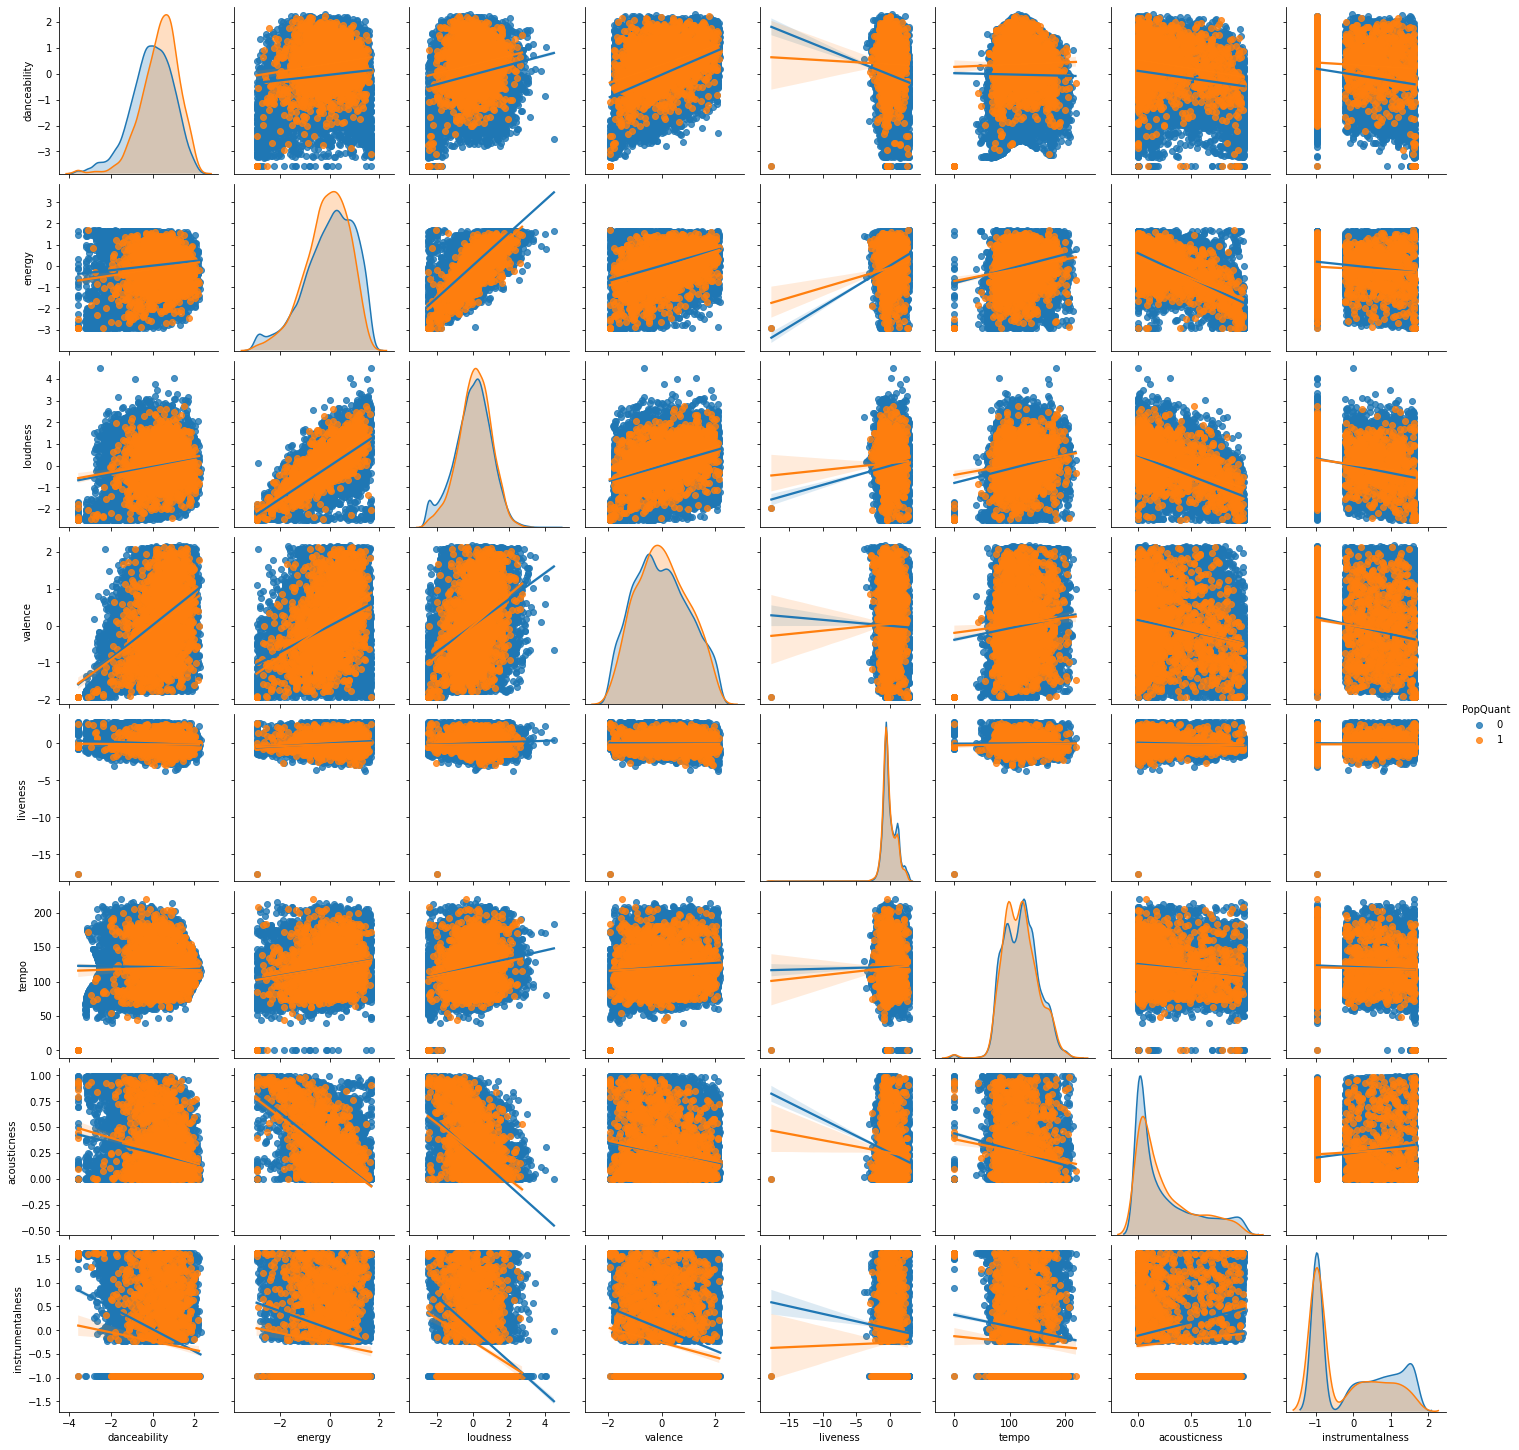

In [71]:
pairplot(DataTen,'10s')

Binned Popularity according to 10 quantiles [19. 25. 28. 31. 33. 36. 39. 42. 46. 53. 84.]
80s :


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Binned Popularity according to 10 quantiles [25. 33. 36. 38. 41. 43. 45. 48. 52. 58. 83.]
90s :


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Binned Popularity according to 10 quantiles [33. 41. 43. 45. 47. 49. 51. 54. 57. 62. 84.]
00s :


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Binned Popularity according to 10 quantiles [41. 49. 52. 55. 57. 60. 62. 65. 68. 72. 97.]
10s :


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

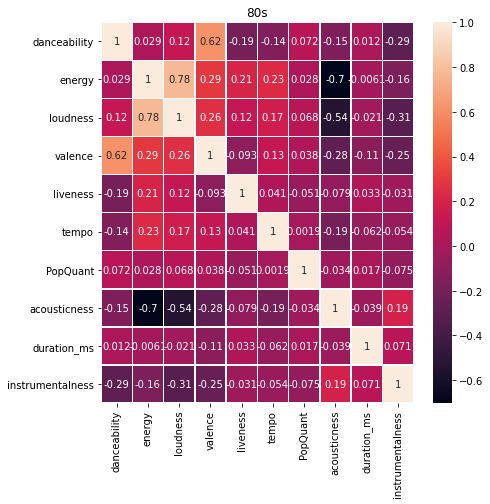

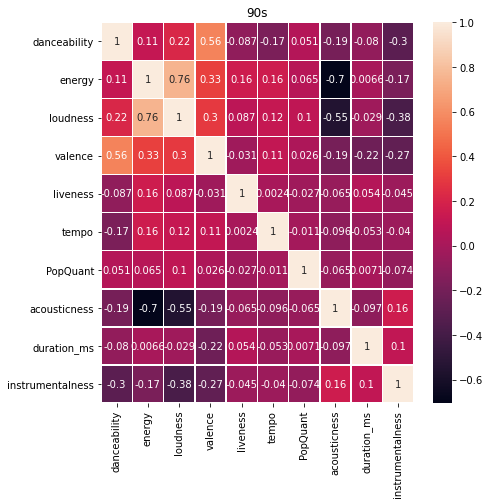

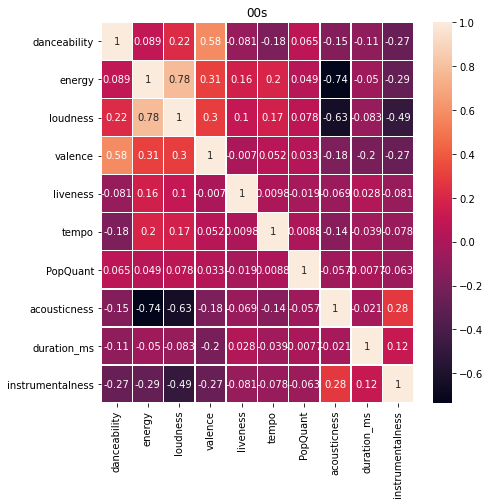

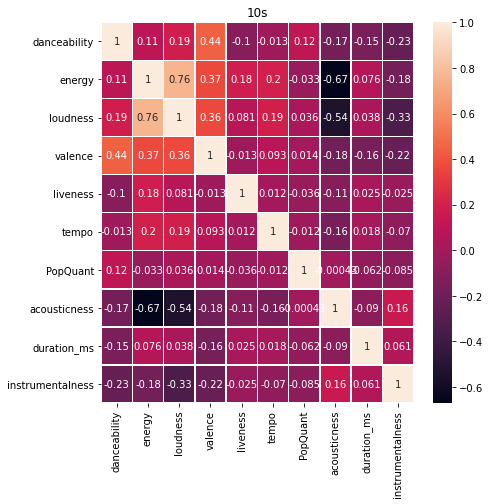

In [69]:
heat_map(DataEight,'80s')
heat_map(DataNine,'90s')
heat_map(DataZero,'00s')
heat_map(DataTen,'10s')

In [ ]:
#probability for categorical variables being popular or not
def pop_prob(Data):
 DataNumerical=PopQuant(Data)
 print(DataNumerical[['mode','PopQuant']].groupby('mode').mean().sort_values(by="PopQuant",ascending = False))
 print(DataNumerical[['time_signature','PopQuant']].groupby('time_signature').mean().sort_values(by="PopQuant",ascending = False))
 print(DataNumerical[['key','PopQuant']].groupby('key').mean().sort_values(by="PopQuant",ascending = False))
 



In [58]:
# 1/10 data is popular, so any more aggregrate than that could be an indication for popularity, Doesn't look like mode,time_signature or key is important
pop_prob(DataTen)

In [75]:
def DataNumerical(Data):
  DataNumerical=PopQuant(Data)
  y=DataNumerical['PopQuant']
  x=DataNumerical[['danceability','energy','loudness','valence','liveness','tempo','acousticness','duration_ms','instrumentalness']]
  return np.array(x),np.array(y)

In [76]:
def DataCategorical(data):
  DataCategorical=PopQuant(Data)
  y=DataCategorical['PopQuant']
  x=DataCategorical[['mode','time_signature','key']]
  return x,y

In [72]:
# Function to calculate one-way-anova
def calculateStat(Numerical , Categorical): 
    fValue={}
    pValue={}
    scaler = StandardScaler()
    Numerical = scaler.fit_transform(Numerical)
    column=['danceability','energy','loudness','valence','liveness','tempo','acousticness','duration_ms','instrumentalness']
    var_1 = Numerical[Categorical==1] 
    var_0 = Numerical[Categorical==0] 
    for i,col in enumerate(column):
     fValue[col], pValue[col] = stats.f_oneway(var_1[:,i], var_0[:,i])
    value=pd.DataFrame([fValue,pValue],index=['f','pValue'])
    return value
 

In [77]:
transform(DataTen)
x,y=DataNumerical(DataTen)
calculateStat(x,y)

Binned Popularity according to 10 quantiles [41. 49. 52. 55. 57. 60. 62. 65. 68. 72. 97.]


,danceability,energy,loudness,valence,liveness,tempo,acousticness,duration_ms,instrumentalness
f,2.834747e+02,21.794906,2.628896e+01,4.115331,2.659606e+01,3.026575,0.003671,7.758586e+01,1.464283e+02
pValue,3.578425e-63,0.000003,2.967056e-07,0.042509,2.531455e-07,0.081926,0.951685,1.372464e-18,1.371316e-33


In [ ]:

def one_hot_encode(Data):
  Data = pd.get_dummies(Data, columns=['mode','time_signature','key'])
  return Data


In [ ]:

def reduce_mem_usage(df):

    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            if str(col_type)[:3] == 'int':   
              df[col] = df[col].astype(np.int8)
            else:
              df[col] = df[col].astype(np.float16)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
# Prepare the training variables, for Randomforest it was not necessary to one hot encode ( or to scale, but I did that anyway)
def trainvar(Data,scaling,test_size,modeltype,forest):
 DataNi=PopQuant(Data)
 reduce_mem_usage(DataNi)
 DataY=DataNi['PopQuant']
 DataY_=DataNi['PopularityScore']
 if forest==True:
  DataX=DataNi
 else:
  DataX=one_hot_encode(DataNi)
 DataX=DataX.drop(['PopularityScore','PopQuant'],axis=1)
 if scaling == 'standard' :
  scaler_=StandardScaler()
  DataX_=scaler_.fit_transform(DataX)
 if scaling == 'minmax':
  scaler=MinMaxScaler(feature_range = (0,1))
  DataX_=scaler.fit_transform(DataX)
 else:
  DataX_=DataX
 if modeltype == 'regression':
  X_train, X_test, y_train, y_test = train_test_split(DataX_,DataY_ ,test_size=test_size)
 else:
  X_train, X_test, y_train, y_test = train_test_split(DataX_,DataY ,test_size=test_size)
 return X_train, X_test, y_train, y_test

In [ ]:

X_train, X_test, y_train, y_test = trainvar(DataTen,'minmax',0.25,'regression',True)
y_train



Binned Popularity according to 10 quantiles [41. 49. 52. 55. 57. 60. 62. 65. 68. 72. 97.]
Memory usage of dataframe is 2.59 MB
Memory usage after optimization is: 0.63 MB
Decreased by 75.7%


67672    47
72889    61
75565    58
78222    79
67061    55
         ..
63667    43
68173    64
66765    52
74791    63
62083    65
Name: PopularityScore, Length: 14999, dtype: int8

In [ ]:
# Function for confusion matrix
def conf(model,y_test,yHat):
 cm=confusion_matrix(y_test,yHat)
 print(classification_report(y_test,yHat))
 sns.heatmap(cm,linewidths=0.5,annot=True)


In [ ]:
# To calculate feature importance
def feat_imp(model,Data,type):
 DataNi=PopQuant(Data)
 DataX=one_hot_encode(DataNi)
 DataX=DataX.drop(['PopularityScore','PopQuant'],axis=1)
 DataX_=PopQuant(Data)
 DataX_=DataX_.drop(['PopularityScore','PopQuant'],axis=1)
 if type == 'nonforest':
  importance = model.coef_[0]
 else:
  importance = model.feature_importances_
 for i,v in zip(DataX.columns,importance):
  print(i,' : %.5f'%(v))
 fig=plt.figure(figsize=(20,20))
 if type=='nonforest':
  plt.subplot(2,1,1)
  plt.bar(DataX.columns[:10],importance[:10])
  plt.savefig('feature_imp_1.png' )
  files.download('feature_imp_1.png' )
  plt.subplot(2,1,2)
  plt.bar(DataX.columns[10:30],importance[10:30])
  plt.tick_params(labelsize=5)
  plt.savefig('feature_imp_2.png' )
  files.download('feature_imp_2.png' )
 else:
  plt.bar(DataX_.columns,importance)
  plt.savefig('feature_imp.png' )
  files.download('feature_imp.png' )


In [ ]:
# Function to calculate AUC of ROC
def ROC(X_test,X_train,y_train,y_test,clf,modelname):
 NS = [0 for _ in range(len(y_test))]
 modelprob = clf.predict_proba(X_test)
 modelprob=modelprob[:,1]
 modelprob_t = clf.predict_proba(X_train)
 modelprob_t=modelprob_t[:,1]
 ns_auc = roc_auc_score(y_test, NS )
 m_auc = roc_auc_score(y_test, modelprob)
 m_auc_t = roc_auc_score(y_train, modelprob_t)
 print('No Skill: ROC AUC=%.3f' % (ns_auc))
 print(modelname,': test ROC AUC=%.3f' % (m_auc))
 print(modelname,':train ROC AUC=%.3f' % (m_auc_t))
 m_fpr_,m_tpr_, _ = roc_curve(y_test, NS)
 m_fpr, m_tpr, _ = roc_curve(y_test, modelprob)
 m_fpr_t, m_tpr_t, _ = roc_curve(y_train, modelprob_t)
 fig=plt.figure(figsize=(10,10))
 plt.plot(m_fpr_, m_tpr_, linestyle='dashed', label='No Skill')
 plt.plot(m_fpr, m_tpr, marker='x', label='test')
 plt.plot(m_fpr_t, m_tpr_t, marker='.', label='train')
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.legend()
 plt.savefig(f'ROC_{modelname}.png' )
 files.download(f'ROC_{modelname}.png' )

 plt.show()


In [ ]:
# Grid Search for best logistic Regression Model 
param= {
     'solver' : ['lbfgs', 'liblinear','sag','saga'],
     'C' : np.logspace(0.01, 3 , num=10)}

m_auc=0
best_model = LogisticRegression(class_weight='balanced',random_state=0)
accuracy=0
dict_param_={ }
for solver in param['solver']:
  for C in param['C']:
    model=LogisticRegression(solver=solver,C=C,random_state=0,max_iter=100,n_jobs=-1,class_weight='balanced')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    curr_accuracy=accuracy_score(y_test,y_pred)
    modelprob=model.predict_proba(X_test)
    modelprob=modelprob[:,1]
    curr_m_auc = roc_auc_score(y_test, modelprob) 
    dict_param_[(solver,C)]=curr_m_auc
    print("for params :",solver," ",C," the ROC AUC is  : ",dict_param_[(solver,C)])
    if curr_m_auc > m_auc:
      m_auc=curr_m_auc
      best_model=model




best_model


for params : lbfgs   1.023292992280754  the ROC AUC is  :  0.6991751983276159
for params : lbfgs   2.19898477375354  the ROC AUC is  :  0.7003972221764085
for params : lbfgs   4.725463842395996  the ROC AUC is  :  0.7008616015470377
for params : lbfgs   10.154689924330807  the ROC AUC is  :  0.7012332081244228
for params : lbfgs   21.821715475664465  the ROC AUC is  :  0.7013208268735981
for params : lbfgs   46.89333400125802  the ROC AUC is  :  0.701291964226811
for params : lbfgs   100.77048141361044  the ROC AUC is  :  0.7013125804030874
for params : lbfgs   216.54868736904876  the ROC AUC is  :  0.7013280425352949
for params : lbfgs   465.34792077439084  the ROC AUC is  :  0.7013445354763161
for params : lbfgs   1000.0  the ROC AUC is  :  0.7013481433071646
for params : liblinear   1.023292992280754  the ROC AUC is  :  0.6983510666809605


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


for params : liblinear   2.19898477375354  the ROC AUC is  :  0.6998704788725425
for params : liblinear   4.725463842395996  the ROC AUC is  :  0.7006626554459691


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


for params : liblinear   10.154689924330807  the ROC AUC is  :  0.7010316850013194
for params : liblinear   21.821715475664465  the ROC AUC is  :  0.7012337235288295


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


for params : liblinear   46.89333400125802  the ROC AUC is  :  0.7012935104400316
for params : liblinear   100.77048141361044  the ROC AUC is  :  0.7013234038956326


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


for params : liblinear   216.54868736904876  the ROC AUC is  :  0.7013429892630954
for params : liblinear   465.34792077439084  the ROC AUC is  :  0.7013445354763161


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


for params : liblinear   1000.0  the ROC AUC is  :  0.7013491741159784


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


for params : sag   1.023292992280754  the ROC AUC is  :  0.6228453518768966


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


for params : sag   2.19898477375354  the ROC AUC is  :  0.6577681236805648


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


for params : sag   4.725463842395996  the ROC AUC is  :  0.6053504646886132


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


for params : sag   10.154689924330807  the ROC AUC is  :  0.6778091086390026


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


for params : sag   21.821715475664465  the ROC AUC is  :  0.6478388577813694


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


for params : sag   46.89333400125802  the ROC AUC is  :  0.6614955283513656


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


for params : sag   100.77048141361044  the ROC AUC is  :  0.6773117433863307


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


for params : sag   216.54868736904876  the ROC AUC is  :  0.6411406621091172


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


for params : sag   465.34792077439084  the ROC AUC is  :  0.6751248824877952


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


for params : sag   1000.0  the ROC AUC is  :  0.6631278141080619
for params : saga   1.023292992280754  the ROC AUC is  :  0.6991963299082993


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


for params : saga   2.19898477375354  the ROC AUC is  :  0.7002920796773981


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


for params : saga   4.725463842395996  the ROC AUC is  :  0.7000147921064784


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


for params : saga   10.154689924330807  the ROC AUC is  :  0.6968620633493865


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


for params : saga   21.821715475664465  the ROC AUC is  :  0.6959992763722126


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


for params : saga   46.89333400125802  the ROC AUC is  :  0.6955158270385275


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


for params : saga   100.77048141361044  the ROC AUC is  :  0.6951710214903022


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


for params : saga   216.54868736904876  the ROC AUC is  :  0.6949906299478823


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


for params : saga   465.34792077439084  the ROC AUC is  :  0.6948607480373401
for params : saga   1000.0  the ROC AUC is  :  0.694782921971896


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1000.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_hat=best_model.predict(X_test)
conf(best_model,y_test,y_hat)

No Skill: ROC AUC=0.500
logistic : test ROC AUC=0.701
logistic :train ROC AUC=0.706


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

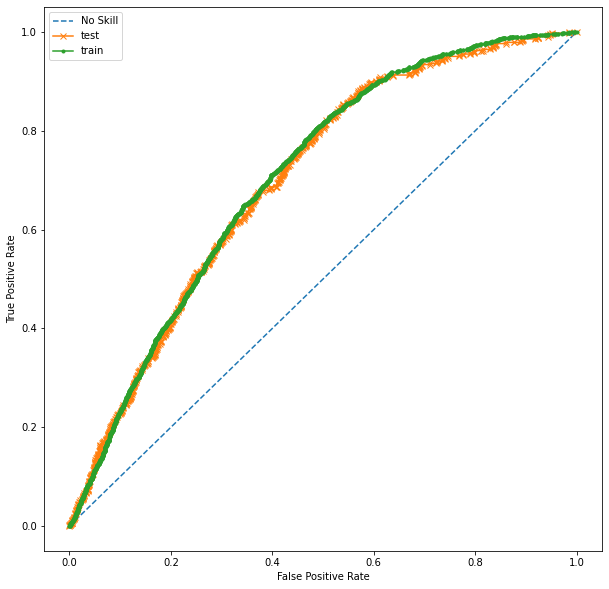

In [ ]:
ROC(X_test,X_train,y_train,y_test,best_model,'logistic')

Binned Popularity according to 10 quantiles [41. 49. 52. 55. 57. 60. 62. 65. 68. 72. 97.]
Binned Popularity according to 10 quantiles [41. 49. 52. 55. 57. 60. 62. 65. 68. 72. 97.]
acousticness  : 0.00445
danceability  : 2.40557
duration_ms  : 0.14697
energy  : -2.10737
instrumentalness  : -0.91483
liveness  : -0.22000
loudness  : 6.44525
speechiness  : -0.35560
tempo  : 0.34747
valence  : -0.35402
NoOfMarkets  : 2.26421
mode_0  : -1.95850
mode_1  : -2.08456
time_signature_0  : 2.04272
time_signature_1  : -2.10621
time_signature_3  : -1.83371
time_signature_4  : -1.36705
time_signature_5  : -0.77882
key_0  : -0.36454
key_1  : -0.29845
key_2  : -0.33148
key_3  : -0.28672
key_4  : -0.35020
key_5  : -0.42526
key_6  : -0.27163
key_7  : -0.45183
key_8  : -0.18363
key_9  : -0.42956
key_10  : -0.32607
key_11  : -0.32369


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

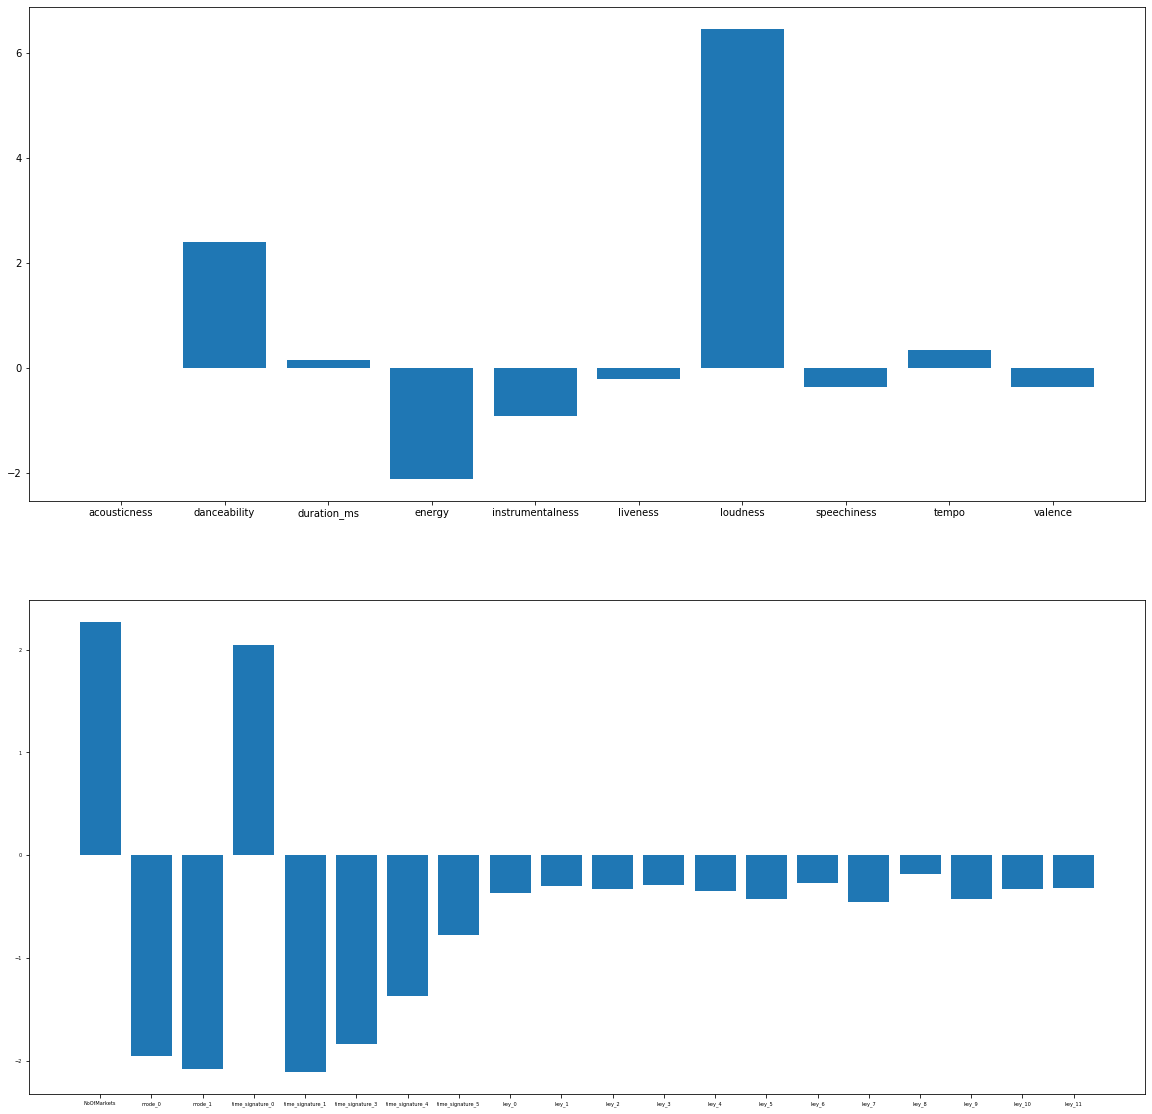

In [ ]:
feat_imp(best_model,DataTen,'nonforest')

In [ ]:
# Random Forest, randomsearchcv
model = RandomForestClassifier(class_weight='balanced')
random_grid= {'bootstrap': [True, False],
 'max_depth': [ 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000],
 'criterion': ['gini','entropy']}

clf = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 5, verbose=2, random_state=42, n_jobs = -1) 
clf.fit(X_train,y_train)

In [ ]:

yHat=clf.predict(X_test)
yhat=clf.predict_proba(X_test)



In [ ]:
ROC(X_test,X_train,y_train,y_test,clf,'Random')

In [ ]:
# Function to define regression accuracy metrics
def regacc(model,X,y):
 y_pred=model.predict(X)
 print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y, y_pred))
 print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, y_pred))
 print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y,  y_pred)))
 mape = np.mean(np.abs((y - y_pred) / np.abs( y_pred)))
 print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
 print('Accuracy:', round(100*(1 - mape), 2))

In [ ]:
# Function to plot distributions of popularity
def PopularityPlot(regr,X,y):
 yhat=regr.predict(X)
 plt.figure(figsize=(15, 15))
 ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
 sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
 plt.title('Actual vs Fitted Values for Popularity')
 plt.xlabel('Popularity')
 plt.savefig('Actual vs Fitted Values for Popularity.png')
 files.download('Actual vs Fitted Values for Popularity.png' )
 plt.show()
 plt.close()

In [ ]:
# Random Search on Random forest 
random_grid={'bootstrap': [True, False],
 'max_depth': [2,5,10, 20, 30, 40, 50, 60, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [200, 400, 600, 800, 1000]}
regr = RandomForestRegressor()
regr = RandomizedSearchCV(estimator = regr, param_distributions = random_grid, cv = 3, verbose=2, random_state=42, n_jobs = -1) 
model=regr.fit(X_train,y_train)


In [ ]:
model_.fit(X_train,y_train)
regacc(model_,X_test,y_test)
feat_imp(model_,DataTen,'forest')

In [ ]:

PopularityPlot(model_,X_train,y_train)
PopularityPlot(model_,X_test,y_test)

In [ ]:
## Grid search on ridge regression with polynominal features
X_train, X_test, y_train, y_test = trainvar(DataTen,'minmax',0.3,'regression')
degree_1 =[1,2,3]
alpha_1= [ 0.01,0.1,1,10,100,200,500,1000]
MSE=10000000
best_degree=-1
for degree in degree_1:
  pr=PolynomialFeatures(degree=degree)
  X_train_=pr.fit_transform(X_train)
  X_test_=pr.fit_transform(X_test)
  for alpha in alpha_1:  
    model=Ridge(alpha=alpha,fit_intercept=True)
    model.fit(X_train_,y_train)
    y_pred=model.predict(X_test_)
    y_pred_train=model.predict(X_train_)
    curr_MSE= metrics.mean_squared_error(y_test, y_pred)
    curr_MSE_train=metrics.mean_squared_error(y_train, y_pred_train)
    print("For degree:",degree,",alpha:",alpha,"the train MSE is",curr_MSE_train,"the test MSE is ",curr_MSE)
    if curr_MSE<MSE:
      MSE=curr_MSE
      best_model=model
      best_degree=degree

   


In [ ]:
pr=PolynomialFeatures(degree=best_degree)
X_train_=pr.fit_transform(X_train)
X_test_=pr.fit_transform(X_test)

In [ ]:
PopularityPlot(best_model,X_train_,y_train)
PopularityPlot(best_model,X_test,y_test)

In [ ]:
# Getting the features for my own track
available_markets=0
track_results = sp.track('0y2Ga0Au2NZaRuIGEAiwTQ')
for i in track_results['album']['available_markets']:
  available_markets+=1

available_markets
DataFrame=pd.DataFrame(audio_feats('0y2Ga0Au2NZaRuIGEAiwTQ'))
DataFrame['NoOfMarkets']=available_markets
